**103: 1. Veri seti, Tek Katmanlı MLP tipli modelleme (Price Lag Rolling Mean)**  
TRAIN

Amaç: 16 ürün için çok çıkışlı regresyon tahmini yapmak.

Girdi:  
- X1_train_multi.npy → Fiyat gecikme 5 periyot rolling mean özellikleri

Çıktı: Her ürün için satış tahminleri.

Model: Tek gizli katmanlı MLP (Multi-Layer Perceptron)  
- Katman 1: X1

Aktivasyon: ReLU

Kayıp Fonksiyonu: Mean Squared Error (MSE)

Optimizasyon: El yazması geri yayılım (backpropagation) + Mini Batch + Early Stopping

Çıktılar: Eğitim & test verileri üzerinden MSE öğrenme eğrisi (Learning Curve) çizilir.  
- En iyi ağırlıklar: `models/103_W1.npy`, `103_b1.npy`, `103_W2.npy`, `103_b2.npy` dosyalarına kaydedilir.


1- KÜTÜPHANE & VERİ YÜKLEME

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

X1_train = np.load('npy/X1_train_multi.npy')
y_train = np.load('npy/y_train_multi.npy')
X1_test = np.load('npy/X1_test_multi.npy')
y_test = np.load('npy/y_test_multi.npy')

print(f"X1_train: {X1_train.shape} | y_train: {y_train.shape}")


X1_train: (210239, 48) | y_train: (210239, 16)


2- GRID SEARCH PARAMETRELERİ

In [6]:
hidden_dims = [128]
lrs = [0.001]
batch_sizes = [4,8,16]

epochs = 50
patience = 7

input_dim = X1_train.shape[1]
output_dim = y_train.shape[1]

def relu(x): return np.maximum(0, x)
def relu_derivative(x): return (x > 0).astype(float)

best_mse_global = float('inf')
best_config = None

if not os.path.exists('models'):
    os.makedirs('models')


3- GRID SEARCH LOOP


Deneme: hidden_dim=128, lr=0.001, batch_size=4
Epoch 1 | Train MSE: 0.2092 | Test MSE: 0.2309
Epoch 2 | Train MSE: 0.2083 | Test MSE: 0.2209
Epoch 3 | Train MSE: 0.2031 | Test MSE: 0.2019
Epoch 4 | Train MSE: 0.2027 | Test MSE: 0.2209
Epoch 5 | Train MSE: 0.2027 | Test MSE: 0.2150
Epoch 6 | Train MSE: 0.2023 | Test MSE: 0.2084
Epoch 7 | Train MSE: 0.2021 | Test MSE: 0.2153
Epoch 8 | Train MSE: 0.2021 | Test MSE: 0.2118
Epoch 9 | Train MSE: 0.2017 | Test MSE: 0.2465
Epoch 10 | Train MSE: 0.2017 | Test MSE: 0.2095
Early stopping at epoch 10
Kombinasyon en iyi Test MSE: 0.2019


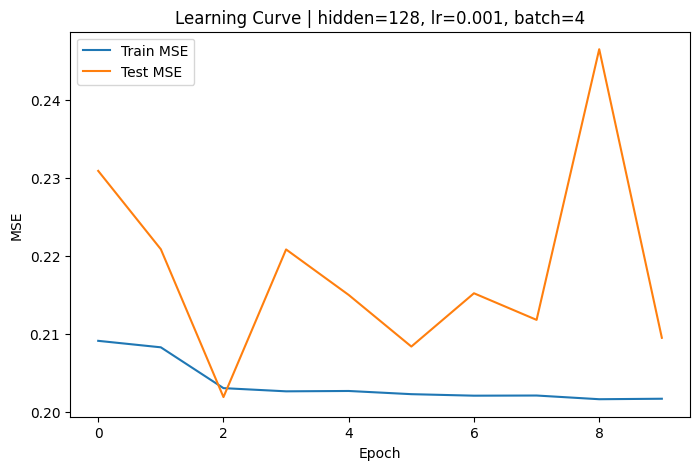


Deneme: hidden_dim=128, lr=0.001, batch_size=8
Epoch 1 | Train MSE: 0.2099 | Test MSE: 0.2493
Epoch 2 | Train MSE: 0.2067 | Test MSE: 0.2147
Epoch 3 | Train MSE: 0.2036 | Test MSE: 0.2083
Epoch 4 | Train MSE: 0.2035 | Test MSE: 0.2029
Epoch 5 | Train MSE: 0.2036 | Test MSE: 0.2021
Epoch 6 | Train MSE: 0.2028 | Test MSE: 0.1993
Epoch 7 | Train MSE: 0.2028 | Test MSE: 0.2014
Epoch 8 | Train MSE: 0.2033 | Test MSE: 0.2020
Epoch 9 | Train MSE: 0.2023 | Test MSE: 0.2059
Epoch 10 | Train MSE: 0.2021 | Test MSE: 0.1992
Epoch 11 | Train MSE: 0.2030 | Test MSE: 0.2054
Epoch 12 | Train MSE: 0.2018 | Test MSE: 0.2036
Epoch 13 | Train MSE: 0.2021 | Test MSE: 0.2085
Epoch 14 | Train MSE: 0.2016 | Test MSE: 0.2030
Epoch 15 | Train MSE: 0.2021 | Test MSE: 0.2060
Epoch 16 | Train MSE: 0.2012 | Test MSE: 0.2050
Epoch 17 | Train MSE: 0.2015 | Test MSE: 0.2001
Early stopping at epoch 17
Kombinasyon en iyi Test MSE: 0.1992


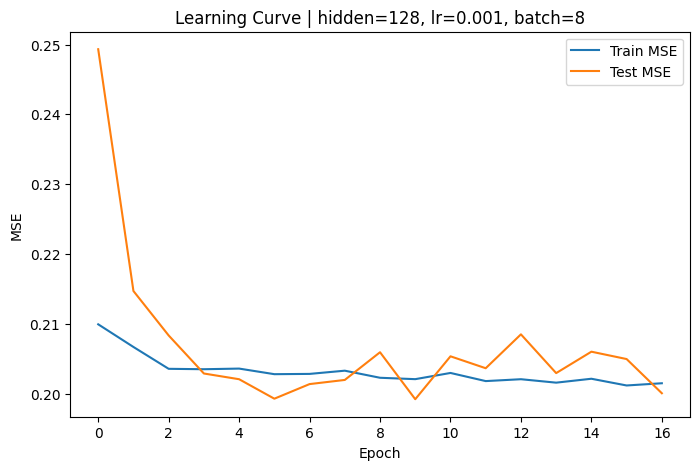


Deneme: hidden_dim=128, lr=0.001, batch_size=16
Epoch 1 | Train MSE: 0.2131 | Test MSE: 0.2819
Epoch 2 | Train MSE: 0.2069 | Test MSE: 0.2299
Epoch 3 | Train MSE: 0.2044 | Test MSE: 0.2263
Epoch 4 | Train MSE: 0.2038 | Test MSE: 0.2102
Epoch 5 | Train MSE: 0.2041 | Test MSE: 0.2026
Epoch 6 | Train MSE: 0.2032 | Test MSE: 0.2015
Epoch 7 | Train MSE: 0.2031 | Test MSE: 0.2062
Epoch 8 | Train MSE: 0.2036 | Test MSE: 0.2025
Epoch 9 | Train MSE: 0.2026 | Test MSE: 0.2027
Epoch 10 | Train MSE: 0.2024 | Test MSE: 0.2014
Epoch 11 | Train MSE: 0.2030 | Test MSE: 0.2018
Epoch 12 | Train MSE: 0.2022 | Test MSE: 0.1997
Epoch 13 | Train MSE: 0.2026 | Test MSE: 0.2049
Epoch 14 | Train MSE: 0.2021 | Test MSE: 0.2000
Epoch 15 | Train MSE: 0.2034 | Test MSE: 0.2047
Epoch 16 | Train MSE: 0.2017 | Test MSE: 0.2014
Epoch 17 | Train MSE: 0.2019 | Test MSE: 0.1969
Epoch 18 | Train MSE: 0.2036 | Test MSE: 0.2146
Epoch 19 | Train MSE: 0.2017 | Test MSE: 0.1992
Epoch 20 | Train MSE: 0.2027 | Test MSE: 0.2045


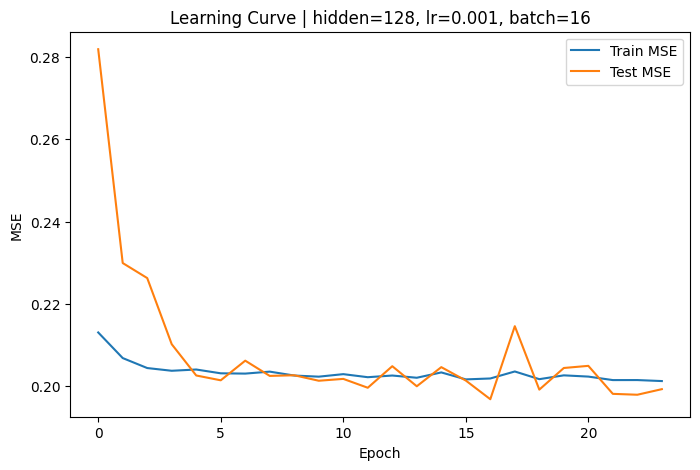

In [7]:
for hidden_dim in hidden_dims:
    for lr in lrs:
        for batch_size in batch_sizes:
            print(f"\nDeneme: hidden_dim={hidden_dim}, lr={lr}, batch_size={batch_size}")

            np.random.seed(42)
            W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2. / input_dim)
            b1 = np.zeros((1, hidden_dim))
            W2 = np.random.randn(hidden_dim, output_dim) * np.sqrt(2. / hidden_dim)
            b2 = np.zeros((1, output_dim))

            best_test_mse = float('inf')
            patience_counter = 0
            train_mse_list, test_mse_list = [], []

            for epoch in range(epochs):
                permutation = np.random.permutation(X1_train.shape[0])
                X_shuffled = X1_train[permutation]
                y_shuffled = y_train[permutation]

                for i in range(0, X1_train.shape[0], batch_size):
                    X_b = X_shuffled[i:i+batch_size]
                    y_b = y_shuffled[i:i+batch_size]

                    Z1 = X_b.dot(W1) + b1
                    A1 = relu(Z1)
                    Z2 = A1.dot(W2) + b2
                    y_pred = Z2

                    dZ2 = 2 * (y_pred - y_b) / y_b.shape[0]
                    dW2 = A1.T.dot(dZ2)
                    db2 = np.sum(dZ2, axis=0, keepdims=True)

                    dA1 = dZ2.dot(W2.T)
                    dZ1 = dA1 * relu_derivative(Z1)
                    dW1 = X_b.T.dot(dZ1)
                    db1 = np.sum(dZ1, axis=0, keepdims=True)

                    W2 -= lr * dW2
                    b2 -= lr * db2
                    W1 -= lr * dW1
                    b1 -= lr * db1

                y_train_pred = relu(X1_train.dot(W1) + b1).dot(W2) + b2
                y_test_pred = relu(X1_test.dot(W1) + b1).dot(W2) + b2

                train_mse = np.mean((y_train - y_train_pred)**2)
                test_mse = np.mean((y_test - y_test_pred)**2)

                train_mse_list.append(train_mse)
                test_mse_list.append(test_mse)

                print(f"Epoch {epoch+1} | Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}")

                if test_mse < best_test_mse:
                    best_test_mse = test_mse
                    patience_counter = 0
                    best_W1, best_b1, best_W2, best_b2 = W1.copy(), b1.copy(), W2.copy(), b2.copy()
                else:
                    patience_counter += 1
                    if patience_counter >= patience:
                        print(f"Early stopping at epoch {epoch+1}")
                        break

            print(f"Kombinasyon en iyi Test MSE: {best_test_mse:.4f}")

            if best_test_mse < best_mse_global:
                best_mse_global = best_test_mse
                best_config = (hidden_dim, lr, batch_size)
                final_W1, final_b1, final_W2, final_b2 = best_W1, best_b1, best_W2, best_b2

            plt.figure(figsize=(8,5))
            plt.plot(train_mse_list, label='Train MSE')
            plt.plot(test_mse_list, label='Test MSE')
            plt.title(f'Learning Curve | hidden={hidden_dim}, lr={lr}, batch={batch_size}')
            plt.xlabel('Epoch')
            plt.ylabel('MSE')
            plt.legend()
            plt.show()


4- EN İYİ SONUÇ & MODEL KAYDET

In [8]:
print(f"\n=== EN İYİ KONFİGÜRASYON ===")
print(f"hidden_dim={best_config[0]}, lr={best_config[1]}, batch_size={best_config[2]}")
print(f"En düşük Test MSE: {best_mse_global:.4f}")

np.save("models/103_W1.npy", final_W1)
np.save("models/103_b1.npy", final_b1)
np.save("models/103_W2.npy", final_W2)
np.save("models/103_b2.npy", final_b2)

print("En iyi model 'models/' klasörüne kaydedildi.")



=== EN İYİ KONFİGÜRASYON ===
hidden_dim=128, lr=0.001, batch_size=16
En düşük Test MSE: 0.1969
En iyi model 'models/' klasörüne kaydedildi.
